In [19]:
# Further informatiion:
# https://mensrunninguk.co.uk/news/london-marathon-stats/
# https://marastats.com/marathon/

import re
from dateutil.parser import *
from dateutil.tz import *
from datetime import *
import pandas as pd


file = open("marathon.txt", encoding="utf_8")

pattern = re.compile(r"(?P<platz>\d+)\.\t(?P<startnr>\d+)\t(?P<name>.*?)\t(?P<jahrgang>\d+)\t(?P<nat>\w+)\t(?P<team>.*?)\t(?P<klasse>[\w ]+)\t(?P<platz_klasse>\d+)\.\t(?P<platz_mw>\d+)\.\t\((?P<brutto>[\d:]+)\)\t(?P<netto>[\d:]+)\t")

df = pd.DataFrame(columns=["platz", "startnr", "name", "jahrgang", "nat", "team", "klasse", "platz_klasse", "platz_mw", "brutto", "netto"])

for line in file:
    match = re.match(pattern, line)
    if match:
        df = df.append({"platz": int(match.group("platz")),
                        "startnr":  int(match.group("startnr")),
                        "name": match.group("name"),
                        "jahrgang":  int(match.group("jahrgang")),
                        "nat": match.group("nat"),
                        "team": match.group("team"),
                        "klasse": match.group("klasse"),
                        "platz_klasse": int(match.group("platz_klasse")),
                        "platz_mw": int(match.group("platz_mw")),
                        "brutto": parse(match.group("brutto")) - parse("0:00:00"),
                        "netto": parse(match.group("netto")) - parse("0:00:00")
                       }, ignore_index=True)
        
print(df.head())


MENÜdeutschEnglisch

Ergebnisse

Anmeldung 2019

Fotogalerien

Wettbewerbe

GENERALI MÜNCHEN MARATHON

München trainiert

News

Shop

Service

Sponsoren & Partner

Presse

Jobs

Datenschutz

Impressum

AGB

GENERALI MÜNCHEN MARATHON

14 OKT 2018

deutschEnglisch



MARATHON

42,195 KM



HALBMARATHON

21,097 KM



MARATHONSTAFFEL

4ER TEAM



MÜNCHNER 10 KM-LAUF

10 KM

ERGEBNISSE





Name, Startnr., Verein, etc. suchen

SUCHEN



DSQ	5143	Artem GREBENKIN	1985	UKR	(München)	M30	 	 	(3:36:42)	3:26:39

DSQ	5012	Pierre ANTUNES	1971	FRA	(Colomiers)	M45	 	 	(3:32:53)	3:32:14

DSQ	4832	Frank SCHUETTE	1969	GER	(Warburg)	M45	 	 	(4:19:14)	4:13:30

DSQ	4778	Martin STÄDELE	1969	GER	(Ottobrunn)	M45	 	 	(5:19:44)	4:59:16

DSQ	4749	Maurizio RICCI	1964	ITA	(Ravenna)	M50	 	 	(4:19:04)	4:18:25

DSQ	4518	Axel MENZEBACH	1973	GER	(Deggendorf)	M45	 	 	(3:56:34)	3:55:59

DSQ	3627	Benoît CROUX	1967	FRA	(Soreze)	M50	 	 	(4:20:05)

DSQ	3422	Carmen SCHILLING	1965	GER	(Buxtehude)	W50	 	 	(5:19:24)

DSQ	3408	Ra

In [25]:
print(df.groupby(["klasse"]).count())

print(df.shape)
print(df.info())
print(df.describe())

        platz  startnr  name  jahrgang  nat  team  platz_klasse  platz_mw  \
klasse                                                                      
M         492      492   492       492  492   492           492       492   
M30       487      487   487       487  487   487           487       487   
M35       599      599   599       599  599   599           599       599   
M40       540      540   540       540  540   540           540       540   
M45       577      577   577       577  577   577           577       577   
M50       463      463   463       463  463   463           463       463   
M55       245      245   245       245  245   245           245       245   
M60       112      112   112       112  112   112           112       112   
M65        45       45    45        45   45    45            45        45   
M70         9        9     9         9    9     9             9         9   
M75         1        1     1         1    1     1             1         1   

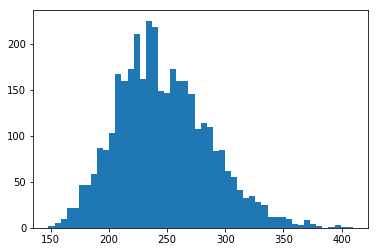

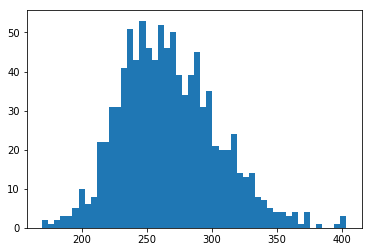

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# convert timedelta objects to minutes
df["brutto_m"] = df["brutto"].dt.total_seconds() / 60.0
df["netto_m"] = df["netto"].dt.total_seconds() / 60.0
df["flag_mann"] = df["klasse"].str[0] == "M"
df_m = df[df["flag_mann"]]
df_w = df[~df["flag_mann"]]

# print(df.head())

_ = plt.hist(x=df_m["netto_m"], bins=50)
_ = plt.show()
_ = plt.hist(x=df_w["netto_m"], bins=50)
_ = plt.show()
              

        platz  startnr  name  jahrgang  nat  team  platz_klasse  platz_mw  \
klasse                                                                      
W         220      220   220       220  220   220           220       220   
W30       131      131   131       131  131   131           131       131   
W35       138      138   138       138  138   138           138       138   
W40       141      141   141       141  141   141           141       141   
W45       164      164   164       164  164   164           164       164   
W50        93       93    93        93   93    93            93        93   
W55        44       44    44        44   44    44            44        44   
W60        25       25    25        25   25    25            25        25   
W65         1        1     1         1    1     1             1         1   
W70         1        1     1         1    1     1             1         1   
W75         1        1     1         1    1     1             1         1   

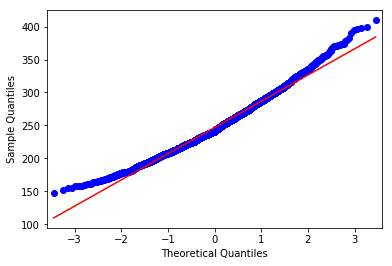

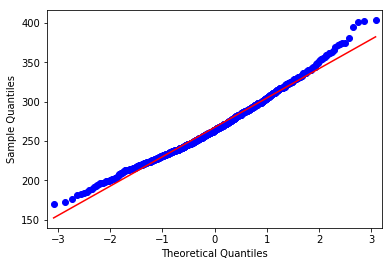

In [34]:
from statsmodels.graphics.gofplots import qqplot

print(df_w.groupby(["klasse"]).count())

# q-q plot
qqplot(df_m["netto_m"], line='s')
_ = plt.show()
qqplot(df_w["netto_m"], line='s')
_ = plt.show()

251.18065062191803 40.22103412309652


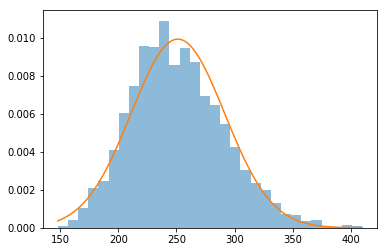

In [16]:
import numpy as np
from scipy import stats

data = df["netto_m"]
(my_loc, my_scale) = stats.norm.fit(data)

print(my_loc, my_scale)

x_space = np.linspace(min(data), max(data), 100)

_ = plt.hist(x=data, bins=30, alpha=0.5, density=True)
_ = plt.plot(x_space, stats.norm.pdf(x_space, my_loc, my_scale))
_ = plt.show()

In [37]:
import scipy.stats as st

def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

get_best_distribution(data)

p value for norm = 6.0523869714404895e-09
p value for exponweib = 6.04444166565549e-05
p value for weibull_max = 0.0
p value for weibull_min = 0.0


C:\Program Files\intelpython3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 0.21008292886290125
Best fitting distribution: genextreme
Best p value: 0.21008292886290125
Parameters for the best fit: (0.1489014416535549, 234.7391079476772, 36.77237115742491)


('genextreme',
 0.21008292886290125,
 (0.1489014416535549, 234.7391079476772, 36.77237115742491))